In [135]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [136]:
subscribers = pd.read_csv(r"C:\Users\mtpha\OneDrive\Documents\Chapman\2020-2021\Semester 2\MGSC 410 (Applied Business Analytics)\Final Project Data\SubscriberClean.csv")

subscribersClean = subscribers.dropna()

subscribersClean.head()

,ID,Language,Subscription Type,Subscription Event Type,Purchase Store,Purchase Amount,Currency,Subscription Start Date,Subscription Expiration,Days Subscribed,...,Country,User Type,Lead Platform,Email Subscriber,Push Notifications,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count
4,9,DEU,Limited,INITIAL_PURCHASE,Web,43.16,USD,3/3/20,6/8/20,97,...,Europe,Consumer,Web,No,Yes,52.0,11.0,0.0,5.0,0.0
5,12,ESP,Limited,INITIAL_PURCHASE,Web,35.97,USD,10/17/19,1/21/20,96,...,US/Canada,Consumer,Web,Yes,Yes,94.0,0.0,0.0,0.0,0.0
7,17,ALL,Lifetime,INITIAL_PURCHASE,Web,199.00,USD,3/25/20,1/1/99,28771,...,US/Canada,Consumer,Web,Yes,Yes,8.0,6.0,3.0,2.0,1.0
14,42,ESP,Limited,INITIAL_PURCHASE,Web,38.89,USD,1/27/20,4/30/20,94,...,US/Canada,Consumer,Web,Yes,Yes,19.0,11.0,4.0,7.0,2.0
15,43,RUS,Limited,INITIAL_PURCHASE,Web,39.00,USD,8/22/19,11/25/19,95,...,Europe,Consumer,Web,No,Yes,79.0,56.0,1.0,38.0,1.0


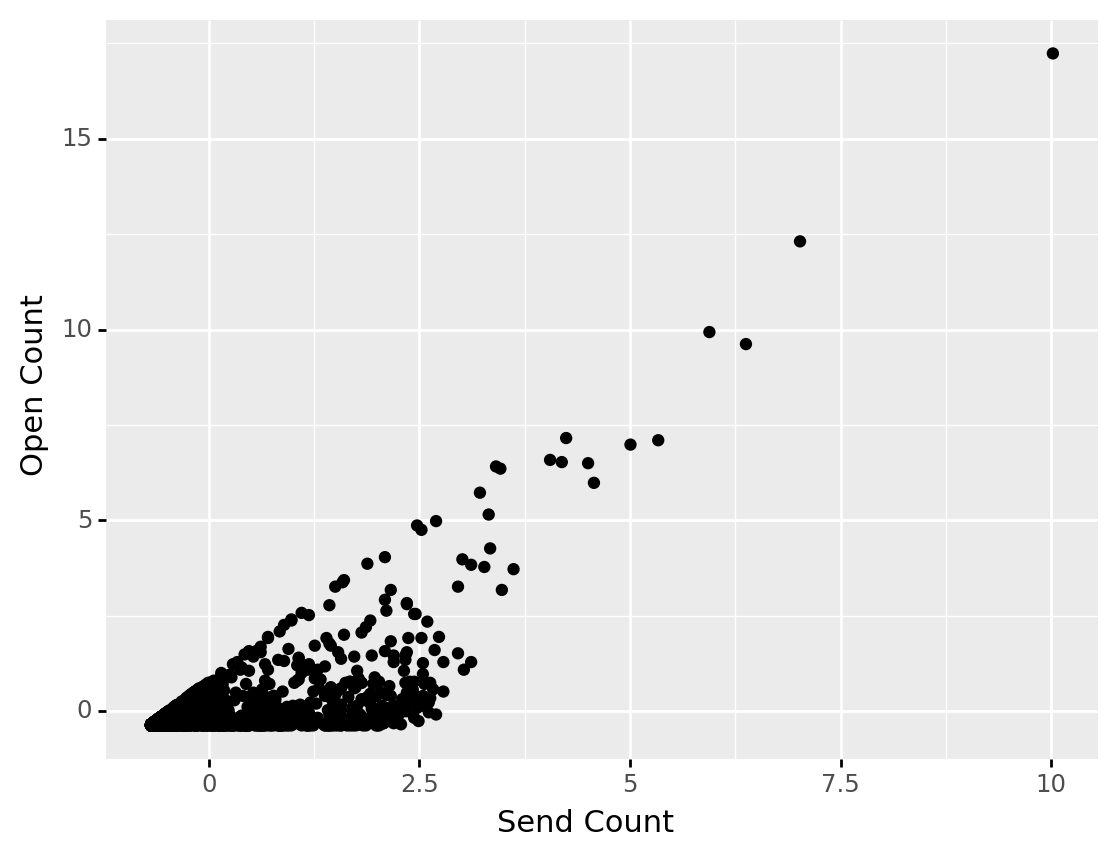

<ggplot: (-2116138699)>

In [137]:
features = ["Send Count", "Open Count", "Click Count"]

X = subscribersClean[features]
z = StandardScaler()

X[features] = z.fit_transform(X)


(ggplot(X, aes("Send Count", "Open Count")) + geom_point())

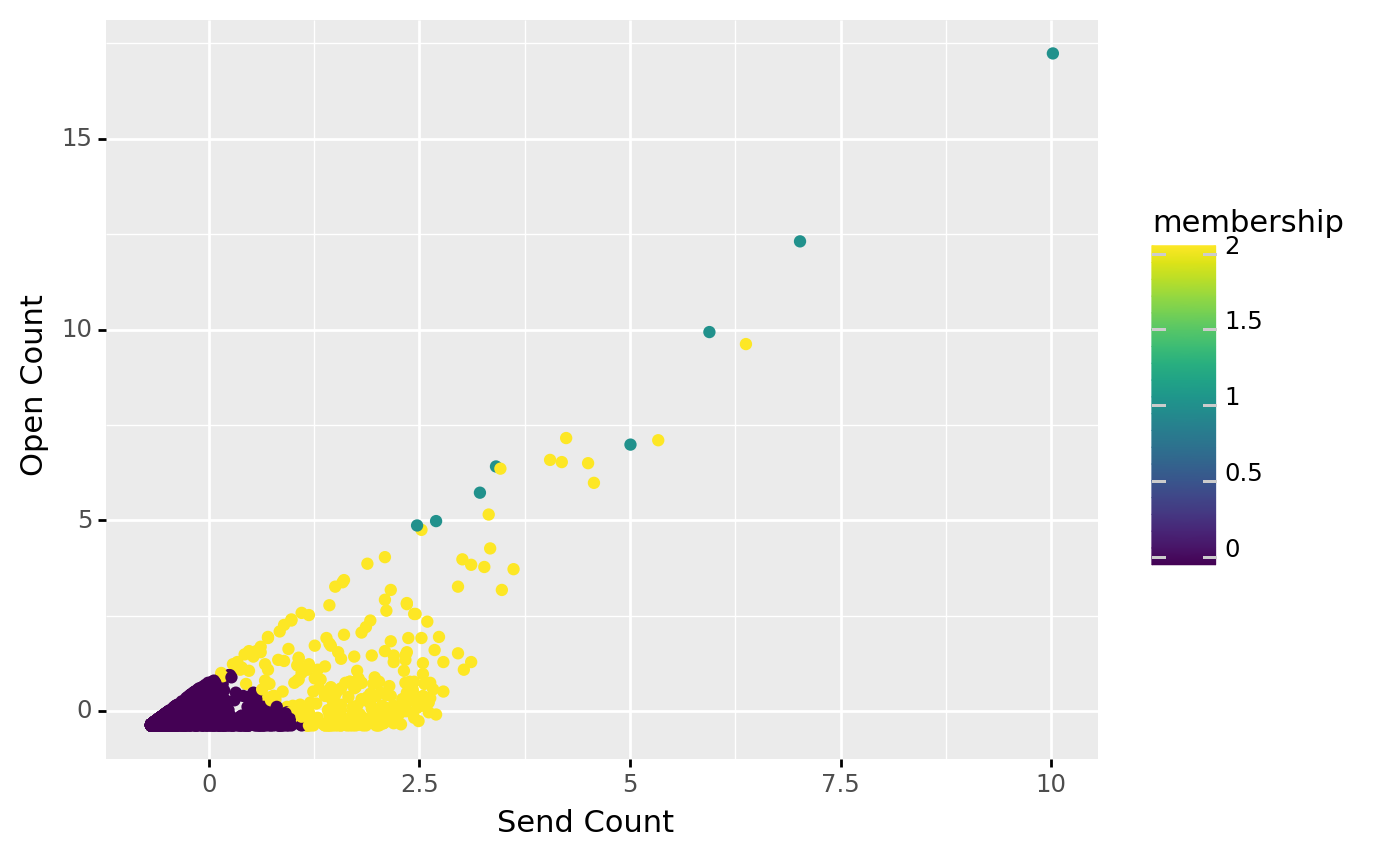

<ggplot: (-2116463967)>

In [138]:
km = KMeans(n_clusters = 3)
km.fit(X)

membership = km.predict(X)

X["cluster"] = membership

(ggplot(X, aes("Send Count", "Open Count", color = "membership")) + geom_point())

In [139]:
silhouette_score(X[["Send Count", "Open Count"]], membership)

0.716489904318095